# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

* Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/
* Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

Finally, if you'd like to get started with Tensorflow, you can read through this tutorial: https://www.tensorflow.org/tutorials/keras/basic_classification. It uses a dataset called "fashion_mnist", which is identical in structure to the original digit mnist, but uses images of clothing rather than images of digits. The number of training examples and number of labels is the same. In fact, you can simply replace the code that loads "fashion_mnist" with "mnist" and everything should work fine.

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that the data gets partitioned into training, development, and test sets. Also, a small subset of the training data called mini_train_data and mini_train_labels gets defined, which you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data from https://www.openml.org/d/554 or from default local location '~/scikit_learn_data/...'
X, Y = fetch_openml(name='mnist_784', return_X_y=True, cache=False)


# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


### Part 1:

Show a 10x10 grid that visualizes 10 examples of each digit.

Notes:
* You can use `plt.rc()` for setting the colormap, for example to black and white.
* You can use `plt.subplot()` for creating subplots.
* You can use `plt.imshow()` for rendering a matrix.
* You can use `np.array.reshape()` for reshaping a 1D feature vector into a 2D matrix (for rendering).

<Figure size 1440x1440 with 0 Axes>

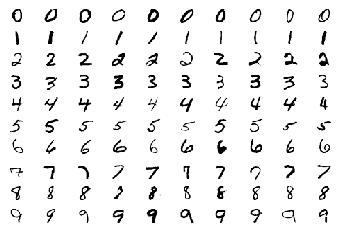

In [3]:
def P1(num_examples=10):

## STUDENT START ##
    
    ## getting 10 values for every number and putting that into one big array (num_data)
    num_data = []
    for number in range(num_examples):
        num_data.append(mini_train_data[mini_train_labels==str(number)][:10])
     
    ## reshaping each element and appending it into a 10x10 matrix
    full_matrix = []
    for i in range(num_examples):
        matrix_num = []
        for j in range(num_examples):
            matrix_num.append(np.reshape(num_data[i][j], (28,28)))
        full_matrix.append(matrix_num)
        
    ## plot the matrix
    plt.rc('lines', linewidth=2)
    plt.figure(figsize = (20,20))
    columns = 10
    rows = 10
    fig, ax_array = plt.subplots(rows, columns,squeeze=False)
    for i,ax_row in enumerate(ax_array):
        for j,axes in enumerate(ax_row):
            axes.imshow(full_matrix[i][j], cmap='Greys')
            axes.set_axis_off()
    plt.show()

## STUDENT END ##

P1(10)

### Part 2:

Produce k-Nearest-Neighbors model with k = [1,3,5,7,9].  Evaluate and show teh performance of each model. For the 1-Nearest Neighbor model, show precision, recall, and F1 for each label. Which is the most difficult digit?

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `classification_report` to get precision, recall, and F1 results.

In [4]:
def P2(k_values):

## STUDENT START ##
    
    for k in k_values:
        
        # train on mini train data
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(mini_train_data, mini_train_labels)
        
        # evaluating on dev data
        y_pred = model.predict(dev_data)
        y_true = dev_labels
        
        print('K = ', k)
        print("Number of misclassified: ", sum(y_true != y_pred))
        print('Accuracy: ', accuracy_score(y_true,y_pred))

        if k == 1:
            print(classification_report(y_true, y_pred))
              
## STUDENT END ##  

k_values = [1, 3, 5, 7, 9]
P2(k_values)

K =  1
Number of misclassified:  116
Accuracy:  0.884
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       106
           1       0.89      0.98      0.93       118
           2       0.90      0.79      0.84       106
           3       0.93      0.87      0.90        97
           4       0.91      0.85      0.88        92
           5       0.86      0.88      0.87        88
           6       0.92      0.92      0.92       102
           7       0.85      0.94      0.89       102
           8       0.83      0.77      0.80        94
           9       0.80      0.86      0.83        95

    accuracy                           0.88      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.88      0.88      1000

K =  3
Number of misclassified:  124
Accuracy:  0.876
K =  5
Number of misclassified:  118
Accuracy:  0.882
K =  7
Number of misclassified:  123
Accuracy:  0.877
K =  9
Number of misclass

ANSWER: 

8 is the most difficult digit. I thas the worst overall precision, recall, and f1-score

### Part 3:

Produce 1-Nearest Neighbor models using training data of various sizes.  Evaluate and show the performance of each model.  Additionally, show the time needed to measure the performance of each model.

Notes:
* Train on the train set.
* Evaluate on the dev set.
* You can use `KNeighborsClassifier` to produce a k-nearest neighbor model.
* You can use `time.time()` to measure elapsed time of operations.

In [5]:
def P3(train_sizes, accuracies):

## STUDENT START ##
    start_time = time.time()
    
    for size in train_sizes:   
        # creating new training data of various sizes
        new_train_data, new_train_labels = train_data[:size], train_labels[:size]
        
        # training on new training data
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(new_train_data, new_train_labels)
        
        # evaluating on dev set
        y_pred = model.predict(dev_data)
        y_true = dev_labels
        accuracy = accuracy_score(y_true, y_pred)
        accuracies.append(accuracy)
        
        # show performance of each model
        print("Training size: ", size)
        print("Number of misclassified: ", sum(y_true != y_pred))
        print('Accuracy: ', accuracy)
        print("Elapsed time of operation: ", time.time() - start_time, "seconds \n")


## STUDENT END ##

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25600]
accuracies = []
P3(train_sizes, accuracies)

Training size:  100
Number of misclassified:  298
Accuracy:  0.702
Elapsed time of operation:  0.16663146018981934 seconds 

Training size:  200
Number of misclassified:  209
Accuracy:  0.791
Elapsed time of operation:  0.4879920482635498 seconds 

Training size:  400
Number of misclassified:  189
Accuracy:  0.811
Elapsed time of operation:  1.117079496383667 seconds 

Training size:  800
Number of misclassified:  134
Accuracy:  0.866
Elapsed time of operation:  2.3374922275543213 seconds 

Training size:  1600
Number of misclassified:  95
Accuracy:  0.905
Elapsed time of operation:  4.850970983505249 seconds 

Training size:  3200
Number of misclassified:  73
Accuracy:  0.927
Elapsed time of operation:  10.159090042114258 seconds 

Training size:  6400
Number of misclassified:  61
Accuracy:  0.939
Elapsed time of operation:  21.212069749832153 seconds 

Training size:  12800
Number of misclassified:  48
Accuracy:  0.952
Elapsed time of operation:  43.55061864852905 seconds 

Training 

### Part 4:

Produce a regression model that predicts accuracy of a 1-Nearest Neighbor model given training set size. Show $R^2$ of the regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.  What's wrong with using regression here?

Apply some transformation that makes the predictions more reasonable.  Show $R^2$ of the improved regression model and the accuracies it predicts for training set sizes 60000, 120000, and 1000000.  Show a lineplot of the actual accuracies and predicted accuracies vs. training set size.

Notes:
* Train the regression models on all of the (transformed) accuracies estimated in Problem 3.
* Evaluate the regression models on all of the (transformed) accuracies estimated in Problem 3.
* You can use `LinearRegression` to produce a linear regression model.
* Remember that the sklearn `fit()` functions take an input matrix X and output vector Y. So, each input example in X is a vector, even if it contains only a single value.

Accuracy predicitions for training set sizes 60000, 120000, and 1000000 are (respectively): 
 [1.23617317 1.63742805 7.52249967]
R2 score:  0.4177006634161019


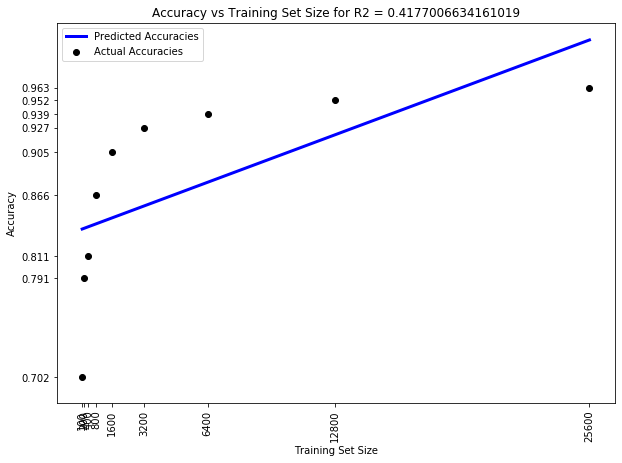

After applying log transformation on training set sizes
Accuracy predicitions for training set sizes 60000, 120000, and 1000000 are (respectively): 
 [1.03358792 1.06432125 1.15833125]
R2 score:  0.9068304252436641


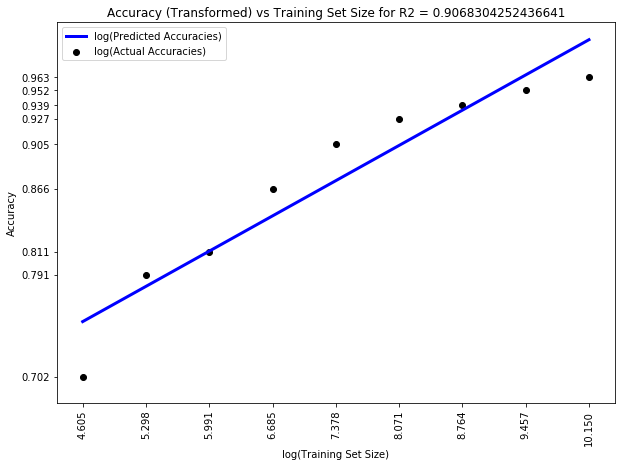

In [6]:
def P4():

## STUDENT START ###
    p4_train_sizes = [60000, 120000, 1000000]
    all_train_sizes = train_sizes + p4_train_sizes

    lr = LinearRegression()
    
    ### UNTRANSFORMED DATA ###
    
    # reshaping the X (train_sizes) in order to get each input as a vector
    train_size_vector = np.reshape(train_sizes,(len(train_sizes),1))
    all_train_size_vector = np.reshape(all_train_sizes,(len(all_train_sizes),1))
    # training linear regression on training set size and accuracy from problem 3
    lr.fit(train_size_vector, accuracies)
    # predicting on bigger training sizes
    acc_pred = lr.predict(all_train_size_vector)
    # r2 score
    r2_score = lr.score(train_size_vector, accuracies)

    # print predicted accuracies and R2 Score
    print('Accuracy predicitions for training set sizes 60000, 120000, and 1000000 are (respectively): \n', acc_pred[-3:])
    print('R2 score: ', r2_score)

    # Plot outputs
    plt.figure(figsize=(10,7))
    plt.scatter(train_sizes, accuracies,  color='black', label = 'Actual Accuracies')
    plt.plot(train_sizes, acc_pred[:-3], color='blue', linewidth=3, label = 'Predicted Accuracies')
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Training Set Size for R2 = {r2_score}')
    plt.xticks(train_sizes, rotation='vertical')
    plt.yticks(accuracies)
    plt.legend()
    plt.show()


    ### TRANSFORMED DATA ###
    # taking the log values of train_sizes

    # reshaping the X (train_sizes) in order to get each input as a vector and taking the log value
    log_train_size_vector = np.log(train_size_vector)
    log_all_train_size_vector = np.log(np.reshape(all_train_sizes,(len(all_train_sizes),1)))
    # training linear regression on training set size and accuracy from problem 3 (transformed)
    lr.fit(log_train_size_vector, accuracies)
    log_acc_pred = lr.predict(log_all_train_size_vector)
    # r2 score
    log_r2_score = lr.score(log_train_size_vector, accuracies)

    # print predicted accuracies and R2 Score
    print('After applying log transformation on training set sizes')
    print('Accuracy predicitions for training set sizes 60000, 120000, and 1000000 are (respectively): \n', log_acc_pred[-3:])
    print('R2 score: ', log_r2_score)

    # Plot outputs
    plt.figure(figsize=(10,7))
    plt.scatter(np.log(train_sizes), accuracies,  color='black', label = 'log(Actual Accuracies)')
    plt.plot(np.log(train_sizes), log_acc_pred[:-3], color='blue', linewidth=3, label = 'log(Predicted Accuracies)')
    plt.xlabel('log(Training Set Size)')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy (Transformed) vs Training Set Size for R2 = {log_r2_score}')
    plt.xticks(np.log(train_sizes), rotation='vertical')
    plt.yticks(accuracies)
    plt.legend()
    plt.show()

## STUDENT END ###

P4()

ANSWER: 

Before the data is transformed, the predicted accuracies for training set sizes 60000, 120000, and 1000000 are (respectively) 1.23617317, 1.63742805, 7.52249967. With the untransformed data, I get a R2 score of 0.418. What's wrong with the model here is that the model captures a linear relationship where the data shows more of a logarithmic relationship. 

After applying the transformation where I take the log values of only the training set sizes, the predicted accuracies for training set sizes 60000, 120000, and 1000000 are (respectively) 1.03358792, 1.06432125, 1.15833125. With the  improved regression model, I get a R2 score of 0.907.

### Part 5:

Produce a 1-Nearest Neighbor model and show the confusion matrix. Which pair of digits does the model confuse most often? Show the images of these most often confused digits.

Notes:
- Train on the mini train set.
- Evaluate performance on the dev set.
- You can use `confusion_matrix()` to produce a confusion matrix.

[[101   0   1   0   0   0   1   1   2   0]
 [  0 116   1   0   0   0   0   0   1   0]
 [  1   4  84   2   2   0   2   4   6   1]
 [  0   2   0  84   0   6   0   2   3   0]
 [  0   0   1   0  78   0   0   2   0  11]
 [  2   0   0   1   1  77   5   0   2   0]
 [  1   2   1   0   1   2  94   0   1   0]
 [  0   1   1   0   0   0   0  96   0   4]
 [  1   5   4   3   1   3   0   1  72   4]
 [  0   1   0   0   3   2   0   7   0  82]]


<Figure size 432x288 with 0 Axes>

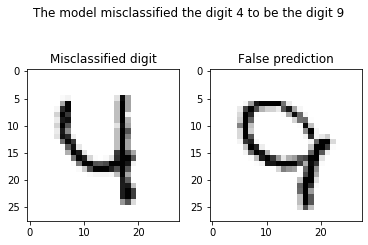

In [7]:
def P5():

## STUDENT START ###
    # training on new training data
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)

    # evaluating on dev set
    y_pred = model.predict(dev_data)
    y_true = dev_labels

    # confusion matrix
    con_matrix = confusion_matrix(y_true, y_pred)
    print(con_matrix)
    
    # getting the most confused digits
    max_i = 0
    max_j = 0
    max_value = 0
    for i in range(10): # row
        for j in range(10): # column
            if j != i:
                if con_matrix[i][j] > max_value:
                    max_value = con_matrix[i][j]
                    max_i, max_j = i,j
    
    misclassified_i = dev_data[(y_true==str(max_i))&(y_pred==str(max_j))]
    
    # showing images of the most confused digits
    plt.figure()
    plt.show()
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.imshow(np.reshape(misclassified_i[0],(28,28)), cmap='Greys')
    ax2.imshow(np.reshape(mini_train_data[mini_train_labels == str(max_j)][0],(28,28)), cmap='Greys')
    ax1.title.set_text('Misclassified digit')
    ax2.title.set_text('False prediction')
    plt.suptitle('The model misclassified the digit 4 to be the digit 9')
    plt.show()

    
## STUDENT END ###

P5()

ANSWER: 

Since the i-th row and j-th column entry of a confusion matrix indicates the number of samples with true label being i-th class and predicted label being j-th class, it looks like the model confuses the digit 4 as 9 the most often.

### Part 6:

A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian, i.e., the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels like this: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values.

Apply your blur filter in 3 ways:
- Filter the training data but not the dev data
- Filter the dev data but not the training data
- Filter both training data and dev data

Show the accuracy resulting no filter and from each way you apply the filter.

Notes:
* Train on the (filtered) mini train set.
* Evaluate performance on the (filtered) dev set.
* There are Guassian blur filters available, for example in `scipy.ndimage.filters`. You are welcome to experiment with those, but you are likely to get the best results with the simplified version described above.

In [8]:
## function to reshape data into 28x28 grids

def grid_data(data):
    grid_data = []
    
    for i in range(len(data)):
        grid = np.reshape(data[i], (28,28))
        grid_data.append(grid)
    
    return grid_data


In [9]:
## function to implement a simplified Gaussian blur by just using the 8 neighboring pixels

def gaussian_blur(grid):
    output_grid = []

    for row in range(grid.shape[0]):
        for column in range(grid.shape[1]):

            if row == 0:
                if column == 0:
                    values = [grid[row][column],grid[row][column+1],grid[row][column+2],
                              grid[row+1][column],grid[row+1][column+1],grid[row+1][column+2],
                              grid[row+2][column],grid[row+2][column+1],grid[row+2][column+2]]
                    output_grid.append(np.mean(values))
                elif (column!=0) & (column!=(grid.shape[1]-1)):
                    values = [grid[row][column-1],grid[row][column],grid[row][column+1],
                              grid[row+1][column-1],grid[row+1][column],grid[row+1][column+1],
                              grid[row+2][column-1],grid[row+2][column],grid[row+2][column+1]]
                    output_grid.append(np.mean(values))
                else:
                    values = [grid[row][column-2],grid[row][column-1],grid[row][column],
                              grid[row+1][column-2],grid[row+1][column-1],grid[row+1][column],
                              grid[row+2][column-2],grid[row+2][column-1],grid[row+2][column]]
                    output_grid.append(np.mean(values))

            elif (row!=0) & (row!=(grid.shape[0]-1)):
                if column == 0:
                    values = [grid[row-1][column],grid[row-1][column+1],grid[row-1][column+2],
                              grid[row][column],grid[row][column+1],grid[row][column+2],
                              grid[row+1][column],grid[row+1][column+1],grid[row+1][column+2]]
                    output_grid.append(np.mean(values))
                elif (column!=0) & (column!=(grid.shape[1]-1)):
                    values = [grid[row-1][column-1],grid[row-1][column],grid[row-1][column+1],
                              grid[row][column-1],grid[row][column],grid[row][column+1],
                              grid[row+1][column-1],grid[row+1][column],grid[row+1][column+1]]
                    output_grid.append(np.mean(values))
                else:
                    values = [grid[row-1][column-2],grid[row-1][column-1],grid[row-1][column],
                              grid[row][column-2],grid[row][column-1],grid[row][column],
                              grid[row+1][column-2],grid[row+1][column-1],grid[row+1][column]]
                    output_grid.append(np.mean(values))

            else:
                if column == 0:
                    values = [grid[row-2][column],grid[row-2][column+1],grid[row-2][column+2],
                              grid[row-1][column],grid[row-1][column+1],grid[row-1][column+2],
                              grid[row][column],grid[row][column+1],grid[row][column+2]]
                    output_grid.append(np.mean(values))
                elif (column!=0) & (column!=(grid.shape[1]-1)):
                    values = [grid[row-2][column-1],grid[row-2][column],grid[row-2][column+1],
                              grid[row-1][column-1],grid[row-1][column],grid[row-1][column+1],
                              grid[row][column-1],grid[row][column],grid[row][column+1]]
                    output_grid.append(np.mean(values))
                else:
                    values = [grid[row-2][column-2],grid[row-2][column-1],grid[row-2][column],
                              grid[row-1][column-2],grid[row-1][column-1],grid[row-1][column],
                              grid[row][column-2],grid[row][column-1],grid[row][column]]
                    output_grid.append(np.mean(values))
    
#     output_grid = np.reshape(output_grid,(28,28))
    return output_grid

In [10]:
## function to filter data

def filter_data(grid_data):
    filtered_data = []

    for i in range(len(grid_data)):
        filtered_data.append(gaussian_blur(grid_data[i]))
        
    return filtered_data

In [11]:
def P6():
    
## STUDENT START ###
    
    # transforming data into 28x28 grids
    grid_train_data = grid_data(mini_train_data)
    grid_dev_data = grid_data(dev_data)
    
    # applying gaussian filter
    filtered_train_data = filter_data(grid_train_data)
    filtered_dev_data = filter_data(grid_dev_data)

    # using 1-nearest neighbor model to train and evaluate
    model = KNeighborsClassifier(n_neighbors=1)
    y_true = dev_labels

    # No filter on training data or dev data
    model.fit(mini_train_data, mini_train_labels)
    y_pred = model.predict(dev_data)
    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy (No filter on training data or dev data) : ', accuracy)

    # Filter the training data but not the dev data
    model.fit(filtered_train_data, mini_train_labels)
    y_pred = model.predict(dev_data)
    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy (Filter the training data but not the dev data) : ', accuracy)

    # Filter the dev data but not the training data
    model.fit(mini_train_data, mini_train_labels)
    y_pred = model.predict(filtered_dev_data)
    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy (Filter the dev data but not the training data) : ', accuracy)

    # Filter both training data and dev data
    model.fit(filtered_train_data, mini_train_labels)
    y_pred = model.predict(filtered_dev_data)
    accuracy = accuracy_score(y_true, y_pred)
    print('Accuracy (Filter the dev data but not the training data) : ', accuracy)
## STUDENT END ###

P6()

Accuracy (No filter on training data or dev data) :  0.884
Accuracy (Filter the training data but not the dev data) :  0.908
Accuracy (Filter the dev data but not the training data) :  0.868
Accuracy (Filter the dev data but not the training data) :  0.903


### Part 7:

Produce two Naive Bayes models and evaluate their performances.  Recall that Naive Bayes estimates P(feature|label), where each label is a categorical, not a real number.

For the first model, map pixel values to either 0 or 1, representing white or black - you should pre-process the data or use `BernoulliNB`'s `binarize` parameter.  Use some reasonable threshold to separate white from black.  Use `BernoulliNB` to produce the model.

For the second model, map pixel values to either 0, 1, or 2, representing white, gray, or black - you should pre-process the data.  Use some reasonable thresholds to separate white from gray from black.  Use `MultinomialNB` to produce the model. 

Show the Bernoulli model accuracy and the Multinomial model accuracy.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* `sklearn`'s Naive Bayes methods can handle real numbers, but for this exercise explicitly do the mapping to categoricals. 

Does the multinomial version improve the results? Why or why not?

In [12]:
## making function to preprocess data
def preprocess(data, binary = True):
    full_preprocessed_data = []

    for number in data:
        preprocessed_number = []
        for pixel in number:
            if binary == True:
                if pixel < 0.5:
                    preprocessed_number.append(0) # white
                else:
                    preprocessed_number.append(1) # black 

            elif binary == False:
                if pixel < 0.33:
                    preprocessed_number.append(0) # white
                elif pixel > 0.33 and pixel < 0.66:
                    preprocessed_number.append(1) # grey
                else:
                    preprocessed_number.append(2)

        full_preprocessed_data.append(preprocessed_number)

    return full_preprocessed_data

## preprocessing the data
binary_train_data = preprocess(mini_train_data, binary=True) # 0 or 1
preprocessed_train_data = preprocess(mini_train_data, binary=False) # 0, 1, or 2

In [13]:
def P7():

## STUDENT START ###
    
    ## training and evaluating
    y_true = dev_labels
    
    # Bernoulli
    bnb = BernoulliNB()
    bnb.fit(binary_train_data, mini_train_labels)
    y_pred_bnb = bnb.predict(dev_data)
    bnb_accuracy = accuracy_score(y_true, y_pred_bnb)
    
    # MultinomialNB
    mnb = MultinomialNB()
    bnb.fit(preprocessed_train_data, mini_train_labels)
    y_pred_mnb = bnb.predict(dev_data)
    mnb_accuracy = accuracy_score(y_true, y_pred_mnb)
    
    # printing accuracies
    print('Bernoulli Accuracy: ', bnb_accuracy)
    print('MultinomialNB Accuracy: ', mnb_accuracy)

    
## STUDENT END ###

P7()

Bernoulli Accuracy:  0.802
MultinomialNB Accuracy:  0.811


ANSWER: MultinomialNB produces slightly better results because we have one more feature that helps the model distinguish what the pixel is. When you look at the pixel data, you see that the values aren't all skewed to either 0 or 1. There are values in the middle that the MNB model accounts for. 

### Part 8:

Search across several values for the LaPlace smoothing parameter (alpha) to find its effect on a Bernoulli Naive Bayes model's performance.  Show the accuracy at each alpha value.

Notes:
* Train on the mini train set.
* Vary alpha and evaulate performance using `GridSearchCV` to cross-validate.
* Cross-validation is based on partitions of the training data, so results will be a bit different than if you used the dev set to evaluate performance.

What is the best value for alpha? What is the accuracy when alpha is near 0? Is this what you'd expect?

In [14]:
def P8(alphas):

## STUDENT START ###

    bnb = BernoulliNB()
    clf = GridSearchCV(bnb, param_grid = alphas)
    # using mini_train_data bc the updated project says set binarize thershold to 0
    clf.fit(mini_train_data, mini_train_labels)
    results_dict = alphas
    results_dict['accuracy'] = clf.cv_results_['mean_test_score']
    print("Accuracy at each alpha value: ", results_dict)
    return clf

## STUDENT END ###

alphas = {'alpha': [1.0e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
print()
print("Best alpha = ", nb.best_params_)

Accuracy at each alpha value:  {'alpha': [1e-10, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0], 'accuracy': array([0.814, 0.819, 0.825, 0.822, 0.818, 0.813, 0.809, 0.805, 0.783])}

Best alpha =  {'alpha': 0.001}


ANSWER: The best value for alpha is 0.001, which gives us the accuracy 0.825. When alpha is near 0, the accuracy is 0.814. I am not surprised that the accuracy is lower than of alpha = 0.001 because as alpha becomes closer and closer towards 0, the model becomes more strict with how it predicts. If alpha is too large, then the model becomes too flexible and predicts things as a 50/50 guess. There is a sweet spot of between these two alphas where the model has the best predicting power and with this example it's alpha = 0.001

### Part 9:

Produce a model using Guassian Naive Bayes, which is intended for real-valued features, and evaluate performance. You will notice that it does not work so well. Diagnose the problem and apply a simple fix so that the model accuracy is around the same as for a Bernoulli Naive Bayes model. Show the model accuracy before your fix and the model accuracy after your fix.  Explain your solution.

Notes:
* Train on the mini train set.
* Evaluate performance on the dev set.
* Consider the effects of theta and sigma.  These are stored in the model's `theta_` and `sigma_` attributes.

In [15]:
def P9():

## STUDENT END ###

    y_true = dev_labels

    # showing accuracy before fixed
    gnb = GaussianNB()
    gnb.fit(mini_train_data, mini_train_labels)
    y_pred = gnb.predict(dev_data)
    print("Accuracy before fixing the model: ", accuracy_score(y_true, y_pred))

    # get gnb.sigma_ values != 0.0 for all features
    sigma_list = []
    for feature in range(len(gnb.sigma_)):
        sigma_list.append(gnb.sigma_[feature][gnb.sigma_[feature]!=0.0])

    # make var_smoothing param the average value of the maximum sigmas for each feature
    var_smoothing_param = np.mean(sigma_list)

    # showing accuracy after fixed
    gnb = GaussianNB(var_smoothing = var_smoothing_param)
    gnb.fit(mini_train_data, mini_train_labels)
    y_pred = gnb.predict(dev_data)
    print("Accuracy after fixing the model: ", accuracy_score(y_true, y_pred))

## STUDENT END ###

P9()

Accuracy before fixing the model:  0.593
Accuracy after fixing the model:  0.817


ANSWER: While we can evaluate the model's theta and sigma values after fitting, those are not parameters we can change within the parameter. However, a parameter we can change is var_smoothing. Var_smoothing adds a user-defined value to the distributions variance and has a default value of 1e-9. Because a Gaussian curve acts sort of like a "low pass" filter, samples close to the mean have more weight than samples further away from the mean. The var_smoothing variable essentially widens the curve and accounts for more samples that are further away from the distribution mean. With this in mind, I took a look at the sigma_ attribute of the model. I assumed that the elements with a greater sigma value were the values in the data set that did not equal 0. Because the var_smoothing default value is set to 1e-9 which is very small compared to the values I saw in the sigma_ attribute, I knew I wanted to set it to a higher value to account for the higher values that I saw. I decided to find all the values of sigma for each feature that didn't equal 0.0 and take the mean as the new var_smoothing parameter. With this fix, I got an accuracy of 0.817 which is similar to the accuracies I got when using the Bernoulli Naive Bayes model. However, I did find that I got an accuracy of 0.821 when I took the mean of the highest 700 sigma values for each feature (which did include some 0.0's), but I got to this answer through trial and error.

### Part 10:

Because Naive Bayes produces a generative model, you can use it to generate digit images.

Produce a Bernoulli Naive Bayes model and then use it to generate a 10x20 grid with 20 example images of each digit. Each pixel output should be either 0 or 1, based on comparing some randomly generated number to the estimated probability of the pixel being either 0 or 1.  Show the grid.

Notes:
* You can use np.random.rand() to generate random numbers from a uniform distribution.
* The estimated probability of each pixel being 0 or 1 is stored in the model's `feature_log_prob_` attribute. You can use `np.exp()` to convert a log probability back to a probability.

How do the generated digit images compare to the training digit images?

<Figure size 2880x2880 with 0 Axes>

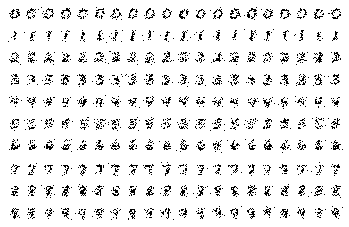

In [18]:
def P10(num_examples):

## STUDENT START ###
    
    # generate estimated probability for each feature
    bnb = BernoulliNB()
    # using binarized training data because it was not specified in the problem
    bnb.fit(binary_train_data, mini_train_labels)

    # take the exponent of each feature_log_prob
    feature_exp = []
    for feature in bnb.feature_log_prob_:
        pixel_list = []
        for pixel in feature:
            pixel_list.append(np.exp(pixel))
        feature_exp.append(pixel_list)
        
    
    # creating newly generated 10 x 20 grid of all features
    
    numbers = range(10)
    all_feature_matrices = [] # contains all 200 matrices

    for feature in numbers:

        # create 20 examples of each number/feature
        random_matrices = np.random.rand(num_examples, 784)

        # newly generated matrices for each feature, will contain 20 matrices
        feature_matrices = [] 

        # for each pixel in each of the 20 matrices, if random pixel < feature_prob pixel output 1. else, output 0
        for matrix in random_matrices:
            new_matrix = [] # will contain just one matrix
            for pixel in range(len(matrix)):
                if matrix[pixel] <= feature_exp[feature][pixel]:
                    new_matrix.append(1)
                else:
                    new_matrix.append(0)
            feature_matrices.append(new_matrix)

        all_feature_matrices.append(feature_matrices)
        
    # reshaping each element and appending it into a 10x20 matrix
    full_matrix = []
    for i in range(len(all_feature_matrices)): # 10 row
        matrix_num = []
        for j in range(len(all_feature_matrices[i])): # 20 columns
            matrix_num.append(np.reshape(all_feature_matrices[i][j], (28,28)))
        full_matrix.append(matrix_num)

    # plot the 10 x 20 grid
    plt.rc('lines', linewidth=2)
    plt.figure(figsize = (40,40))
    columns = num_examples
    rows = 10
    fig, ax_array = plt.subplots(rows, columns,squeeze=False)
    for i,ax_row in enumerate(ax_array):
        for j,axes in enumerate(ax_row):
            axes.imshow(full_matrix[i][j], cmap='Greys')
            axes.set_axis_off()
    plt.show()

## STUDENT END ###

P10(20)

ANSWER: The generated digit images are pretty bad compared to the training digit images. While I'm able to generally piece together the main shape of the images, there is a lot of noise. This suggests to me that the Bernoulli Naive Bayes model does a decent job at picking up what the general image shape is, but is not very accurate.

### Part 11:

Recall that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy.  

Produce a Bernoulli Naive Bayes model.  Evaluate performance: partition the dev set into several buckets based on the posterior probabilities of the predicted classes - think of a bin in a histogram- and then estimate the accuracy for each bucket. So, for each prediction, find the bucket to which the maximum posterior probability belongs, and update "correct" and "total" counters accordingly.  Show the accuracy for each bucket.

Notes:
* Train on the mini train set.
* Evaluate perfromance on the dev set.
* Apply a reasonable Laplace smoothing (alpha) value.

How would you characterize the calibration for this Bernoulli Naive Bayes model?

In [19]:
def P11(buckets, correct, total):
    
## STUDENT START ###

    alpha = 0.001 # found in part 7
    y_true = dev_labels

    # training on mini train set (after binarizing)
    bnb = BernoulliNB(alpha = alpha)
    # fitting on mini train data because updated project specifies binarization threshold = 0
    bnb.fit(binary_train_data, mini_train_labels)

    for data in range(len(dev_data)): # 1000

        # getting the maximum posterior probability
        max_prob = max(bnb.predict_proba(dev_data)[data])

        # iterating through each bucket and adding to the corresponding total or correct bins
        for i in range(len(buckets)):
            if (i==0) & (max_prob <= buckets[i]):
                total[i] += 1
                pred_value = np.argmax(bnb.predict_proba(dev_data)[data])
                if str(pred_value) == dev_labels[data]:
                    correct[i] += 1
            elif (max_prob > buckets[i-1]) & (max_prob <= buckets[i]):
                total[i] += 1
                pred_value = np.argmax(bnb.predict_proba(dev_data)[data])
                if str(pred_value) == dev_labels[data]:
                    correct[i] += 1
    

                
## STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print('p(pred) is %.13f to %.13f    total = %3d    accuracy = %.3f' % (0 if i==0 else buckets[i-1], buckets[i], total[i], accuracy))

p(pred) is 0.0000000000000 to 0.5000000000000    total =   1    accuracy = 0.000
p(pred) is 0.5000000000000 to 0.9000000000000    total =  33    accuracy = 0.424
p(pred) is 0.9000000000000 to 0.9990000000000    total =  66    accuracy = 0.455
p(pred) is 0.9990000000000 to 0.9999900000000    total =  45    accuracy = 0.556
p(pred) is 0.9999900000000 to 0.9999999000000    total =  49    accuracy = 0.490
p(pred) is 0.9999999000000 to 0.9999999990000    total =  62    accuracy = 0.726
p(pred) is 0.9999999990000 to 0.9999999999900    total =  42    accuracy = 0.714
p(pred) is 0.9999999999900 to 0.9999999999999    total =  48    accuracy = 0.771
p(pred) is 0.9999999999999 to 1.0000000000000    total = 654    accuracy = 0.920


ANSWER: I would characterize the calibration for this Bernoulli Naive Bayes model to be a weakly calibrated classifier. As defined in the problem above, a strongly calibrated classifier is roughly 90% accurate when the posterior probability is 0.9. A weakly calibrated classifier is more accurate when the posterior probability of the predicted class is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior probability and accuracy. I think it is too strong of a statement to characterize the calibration for this Bernoulli Naive Bayes model to be poorly classified, because while the accuracies are not consistently rising, you can see the general rising trend of the accuracies. However, this is not a strongly calibrated classifier because we see in the posterior probability bin [0.9, 0.999] that the accuracy is 0.455. The accuracy does not reach above 0.9 until the bin [0.9999999999999, 1.0000000000000]. Therefore, this is a weakly calibrated clssifier because generally the classifier is more accurate the higher the posterior probability is but is not as accurate as the posterior probabilities themselves. 

### Part 12 EXTRA CREDIT:

Design new features to see if you can produce a Bernoulli Naive Bayes model with better performance.  Show the accuracy of a model based on the original features and the accuracy of the model based on the new features.

Here are a few ideas to get you started:
- Try summing or averaging the pixel values in each row.
- Try summing or averaging the pixel values in each column.
- Try summing or averaging the pixel values in each square block. (pick various block sizes)
- Try counting the number of enclosed regions. (8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0)

Notes:
* Train on the mini train set (enhanced to comprise the new features).
* Evaulate performance on the dev set.
* Ensure that your code is well commented.

In [20]:
# function to average pixel values in each row of a dataset

def average_row(data):
    # putting all new matrices into one big list
    avg_row_data = []
    for d in data:
        # creating 1x28 matrix
        avg_row = []
        for row in range(len(d)):
            avg_row.append(np.mean(d[row]))
        avg_row_data.append(avg_row)
    
    return avg_row_data

In [21]:
# function to average pixel values in each column of a dataset

def average_column(data):
    # putting all new matrices into one big list
    avg_col_data = []
    for d in data:
        # creating 28x1 matrix
        avg_col = []
        for row in d:
            col = []
            for i in range(len(row)):
                col.append(row[i])
            avg_col.append(np.mean(col))
        avg_col_data.append(avg_col)
    
    return avg_col_data

In [23]:
# transforming data into 28x28 grids
grid_train_data = grid_data(mini_train_data)
grid_dev_data = grid_data(dev_data)
binary_grid_train_data = grid_data(preprocess(mini_train_data, binary=True))
binary_grid_dev_data = grid_data(preprocess(dev_data, binary=True))

In [24]:
alpha = 0.001 # found in part 7
y_true = dev_labels

# transforming data by averaging pixels in each row
avg_row_train = average_row(grid_train_data)
avg_row_dev = average_row(grid_dev_data)
binary_avg_row_train = average_row(binary_grid_train_data)
binary_avg_row_dev = average_row(binary_grid_dev_data)

# training on mini train set (averaging pixels in each row, before binarizing)
bnb = BernoulliNB(alpha = alpha)
bnb.fit(avg_row_train, mini_train_labels)

# evaluating on dev set (after averaging pixels in each row, before binarizing)
bnb.predict(avg_row_dev)

# accuracy 
print("Accuracy (after averaging pixels in each row, before binarizing): ", bnb.score(avg_row_dev, y_true))

# training on binary mini train set (averaging pixels in each row, after binarizing)
bnb = BernoulliNB(alpha = alpha)
bnb.fit(binary_avg_row_train, mini_train_labels)

# evaluating on dev set (after averaging pixels in each row, after binarizing)
bnb.predict(binary_avg_row_dev)

# accuracy 
print("Accuracy (after averaging pixels in each row, after binarizing): ", bnb.score(binary_avg_row_dev, y_true))

Accuracy (after averaging pixels in each row, before binarizing):  0.385
Accuracy (after averaging pixels in each row, after binarizing):  0.393


In [25]:
# transforming data by averaging pixels in each column
avg_col_train = average_column(grid_train_data)
avg_col_dev = average_column(grid_dev_data)
binary_avg_col_train = average_column(binary_grid_train_data)
binary_avg_col_dev = average_column(binary_grid_dev_data)

# training on mini train set (averaging pixels in each column, before binarizing)
bnb = BernoulliNB(alpha = alpha)
bnb.fit(avg_col_train, mini_train_labels)

# evaluating on dev set (after averaging pixels in each row, before binarizing)
bnb.predict(avg_col_dev)

# accuracy 
print("Accuracy (after averaging pixels in each column, before binarizing): ", bnb.score(avg_col_dev, y_true))

# training on mini train set (averaging pixels in each column, after binarizing)
bnb.fit(binary_avg_col_train, mini_train_labels)

# evaluating on dev set (after averaging pixels in each row, after binarizing)
bnb.predict(binary_avg_col_dev)

# accuracy 
print("Accuracy (after averaging pixels in each column, before binarizing): ", bnb.score(binary_avg_col_dev, y_true))

Accuracy (after averaging pixels in each column, before binarizing):  0.385
Accuracy (after averaging pixels in each column, before binarizing):  0.393


In [26]:
def P12():

## STUDENT START ###
    
    # transforming data into 28x28 grids
    grid_train_data = grid_data(mini_train_data)
    grid_dev_data = grid_data(dev_data)
    binary_grid_train_data = grid_data(preprocess(mini_train_data, binary=True))
    binary_grid_dev_data = grid_data(preprocess(dev_data, binary=True))
    
    alpha = 0.001 # found in part 7
    y_true = dev_labels

    ## averaging row ##
    
    # transforming data by averaging pixels in each row
    avg_row_train = average_row(grid_train_data)
    avg_row_dev = average_row(grid_dev_data)
    binary_avg_row_train = average_row(binary_grid_train_data)
    binary_avg_row_dev = average_row(binary_grid_dev_data)

    # training on mini train set (averaging pixels in each row, before binarizing)
    bnb = BernoulliNB(alpha = alpha)
    bnb.fit(avg_row_train, mini_train_labels)

    # evaluating on dev set (after averaging pixels in each row, before binarizing)
    bnb.predict(avg_row_dev)

    # accuracy 
    print("Accuracy (after averaging pixels in each row, before binarizing): ", bnb.score(avg_row_dev, y_true))

    # training on binary mini train set (averaging pixels in each row, after binarizing)
    bnb = BernoulliNB(alpha = alpha)
    bnb.fit(binary_avg_row_train, mini_train_labels)

    # evaluating on dev set (after averaging pixels in each row, after binarizing)
    bnb.predict(binary_avg_row_dev)

    # accuracy 
    print("Accuracy (after averaging pixels in each row, after binarizing): ", bnb.score(binary_avg_row_dev, y_true))
    
    ## averaging column ##
    # transforming data by averaging pixels in each column
    avg_col_train = average_column(grid_train_data)
    avg_col_dev = average_column(grid_dev_data)
    binary_avg_col_train = average_column(binary_grid_train_data)
    binary_avg_col_dev = average_column(binary_grid_dev_data)

    # training on mini train set (averaging pixels in each column, before binarizing)
    bnb = BernoulliNB(alpha = alpha)
    bnb.fit(avg_col_train, mini_train_labels)

    # evaluating on dev set (after averaging pixels in each row, before binarizing)
    bnb.predict(avg_col_dev)

    # accuracy 
    print("Accuracy (after averaging pixels in each column, before binarizing): ", bnb.score(avg_col_dev, y_true))

    # training on mini train set (averaging pixels in each column, after binarizing)
    bnb.fit(binary_avg_col_train, mini_train_labels)

    # evaluating on dev set (after averaging pixels in each row, after binarizing)
    bnb.predict(binary_avg_col_dev)

    # accuracy 
    print("Accuracy (after averaging pixels in each column, before binarizing): ", bnb.score(binary_avg_col_dev, y_true))
       

## STUDENT END ###

P12()

Accuracy (after averaging pixels in each row, before binarizing):  0.385
Accuracy (after averaging pixels in each row, after binarizing):  0.393
Accuracy (after averaging pixels in each column, before binarizing):  0.385
Accuracy (after averaging pixels in each column, before binarizing):  0.393
